In [1]:
import random
random.seed(123)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
import scipy.stats as stats

In [2]:
sns.set_style("whitegrid")
#sns.set_palette('Set1')

### Part 1: Data Pre-processing

In [3]:
df = pd.read_csv("../resources/data/discords/ECG/mitdbx_mitdbx_108.txt",header=None,names=['col0','col1','col2'],sep="  ")

/home/duys/Documents/machine_learning/lstm_anomaly_thesis/lstm/lib/python2.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
df.drop('col0', axis=1, inplace=True)
df.drop('col2', axis=1, inplace=True)

In [5]:
df.head()

,col1
0,4.995
1,4.995
2,4.995
3,4.995
4,4.995


In [6]:

print df.shape

(21600, 1)


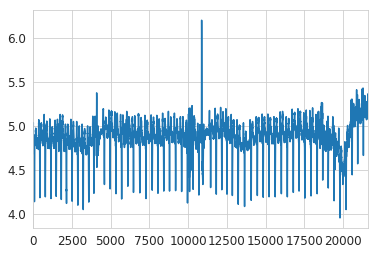

In [7]:
df['col1'].plot()
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,5))
df['col1'][0:1500].plot()
plt.xlabel("Time Step")
plt.ylabel("ECG Measurement")
plt.show()
pp = PdfPages("ECG_normal.pdf")
pp.savefig(fig)
pp.close()

In [ ]:
#isolate anomaly1
fig1 = plt.figure(figsize=(15,5))
df['col1'][3160:5270].plot()
plt.xlabel("Time Step")
plt.ylabel("ECG Measurement")
plt.show()
pp = PdfPages("ECG_anomaly1.pdf")
pp.savefig(fig1)
pp.close()

In [ ]:
#isolate anomaly 2
fig2 = plt.figure(figsize=(15,5))
df['col1'][9110:11750].plot()
plt.xlabel("Time Step")
plt.ylabel("ECG Measurement")
plt.show()
pp = PdfPages("ECG_anomaly2.pdf")
pp.savefig(fig2)
pp.close()

In [ ]:
#isolate end sequence
df['col1'][18030:].plot()
plt.show()

In [ ]:
fig3 = plt.figure(figsize=(15,5))
df = df[:18030]['col1']
df.plot()
plt.show()
plt.xlabel("Time Step")
plt.ylabel("ECG Measurement")
pp = PdfPages("ECG_data.pdf")
pp.savefig(fig3)
pp.close()

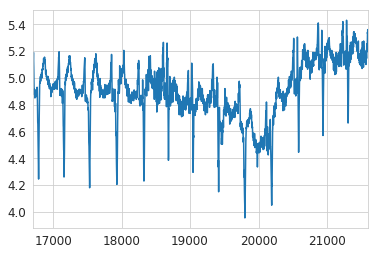

In [8]:
#isolate v1 sequence 
df[16710:]['col1'].plot() 
plt.show()

#isolate v1 sequence
df['col1'][16710:].plot()
plt.show()

In [9]:
df['anomaly'] = 0
df.head()

,col1,anomaly
0,4.995,0
1,4.995,0
2,4.995,0
3,4.995,0
4,4.995,0


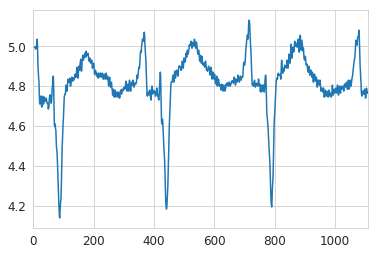

In [10]:
df['col1'][370*0:370*3].plot()
plt.show()

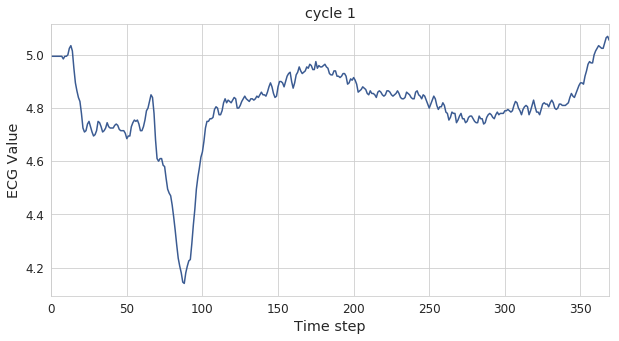

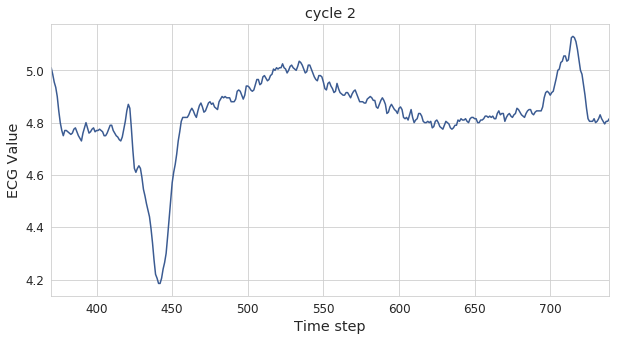

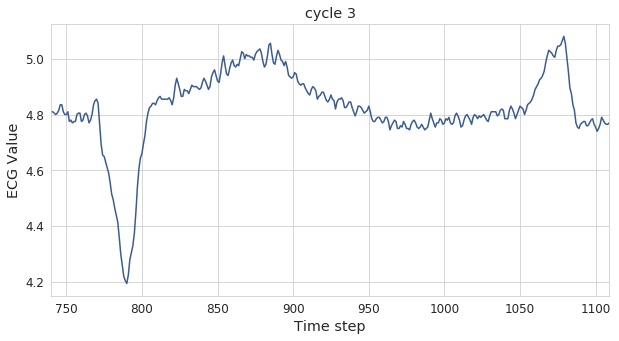

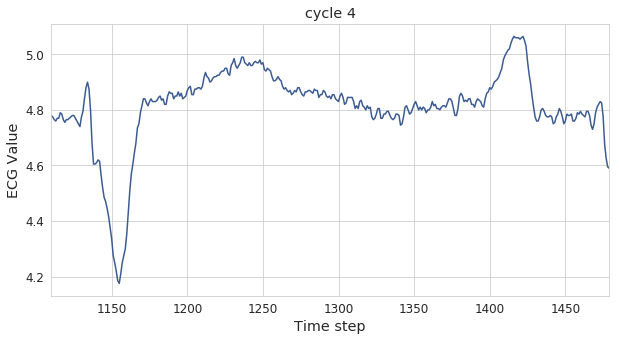

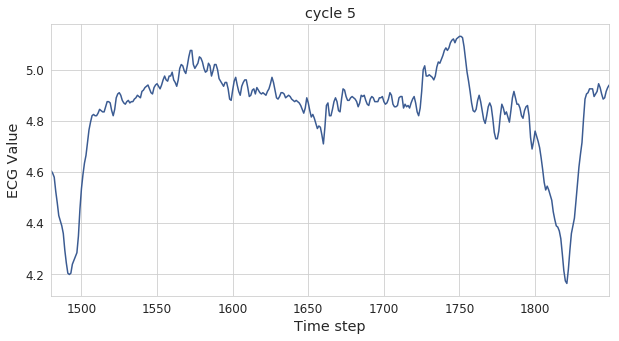

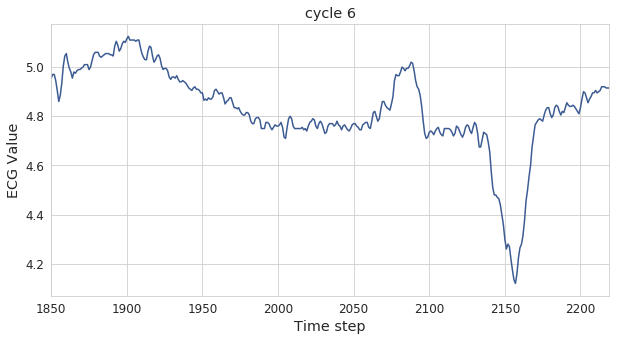

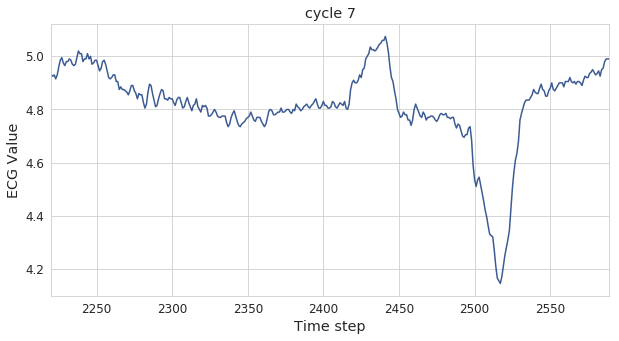

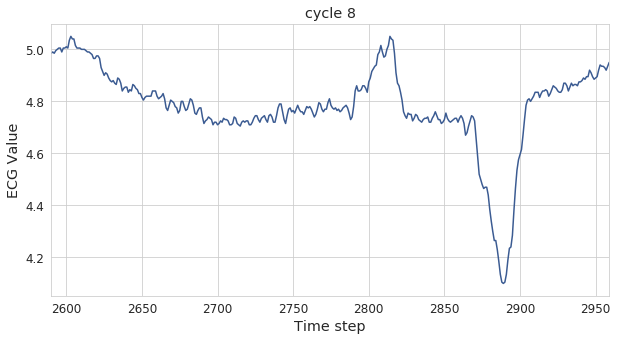

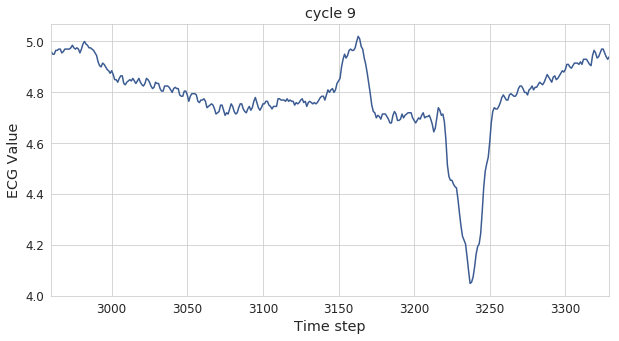

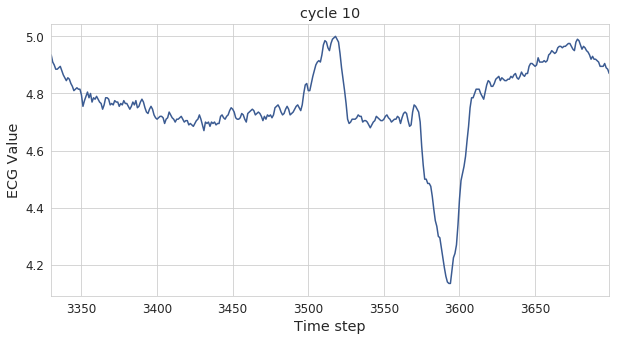

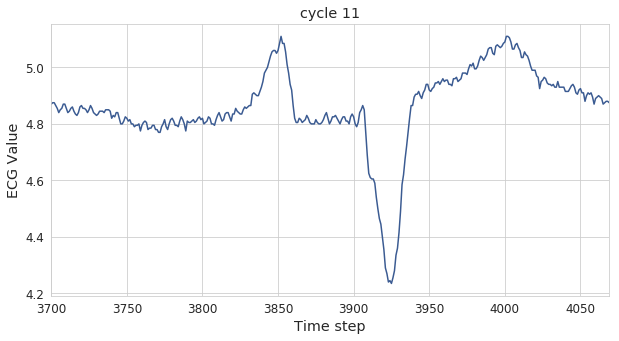

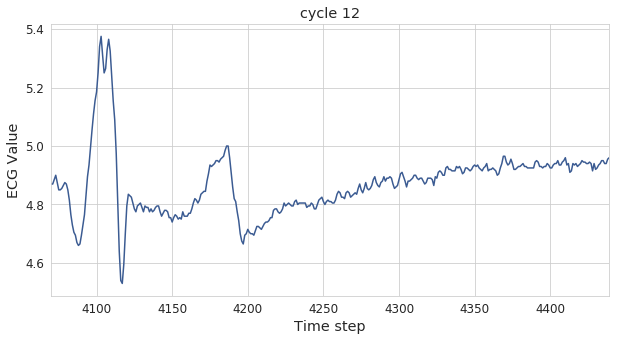

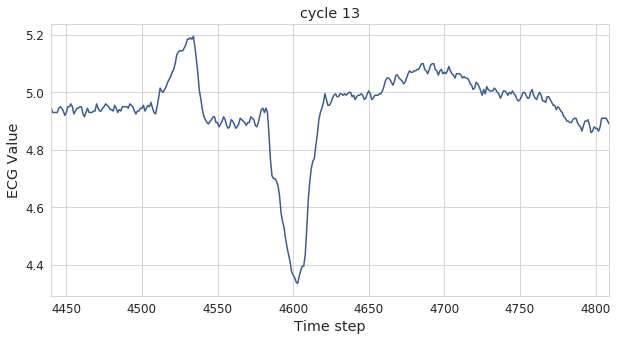

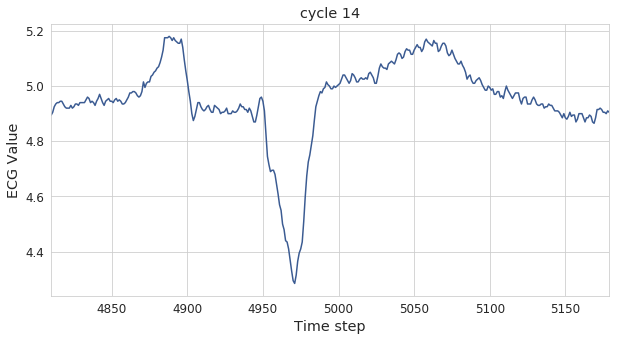

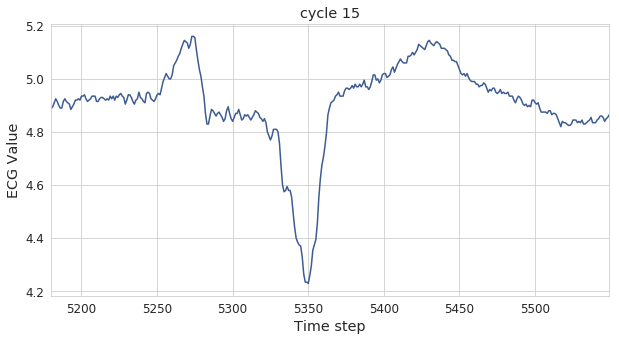

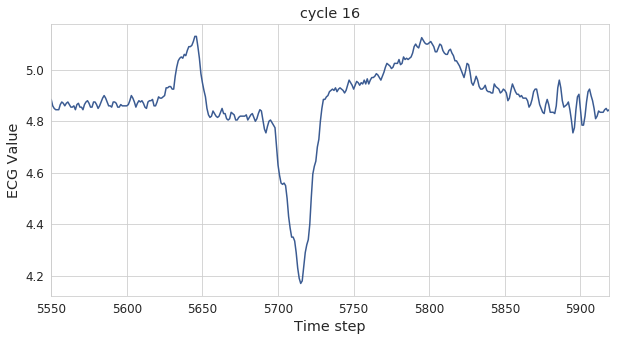

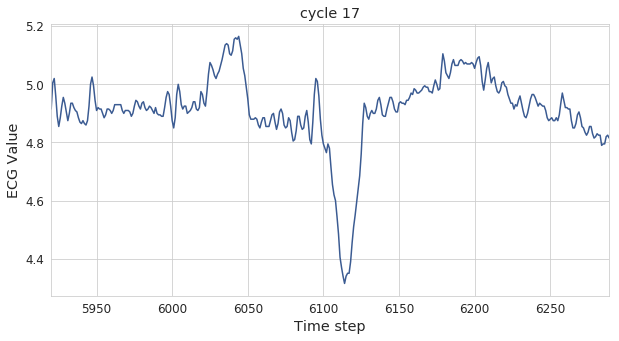

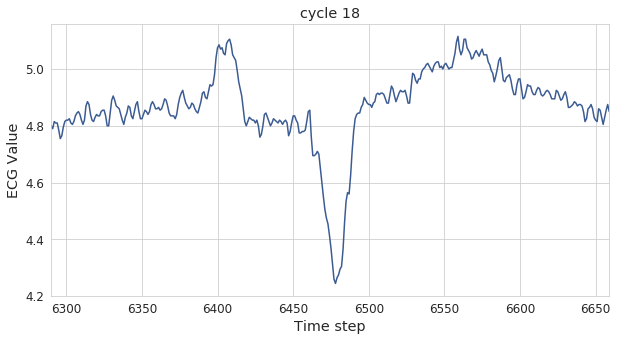

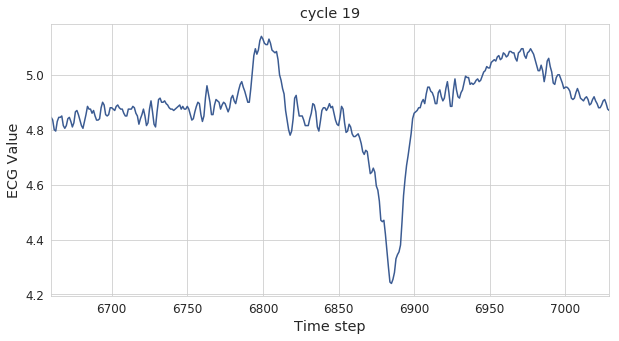

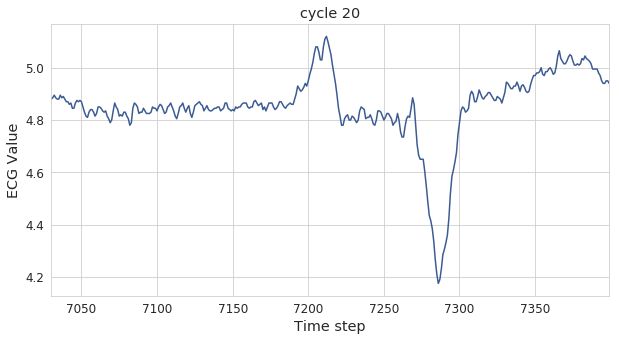

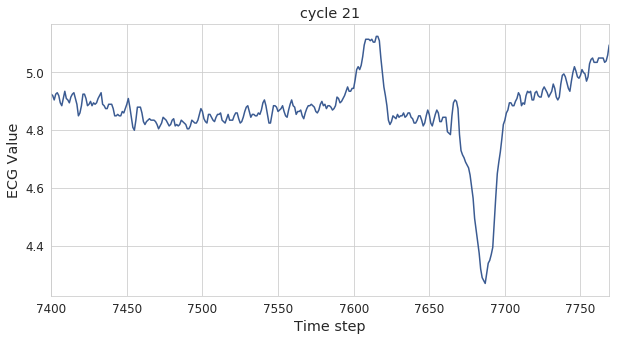

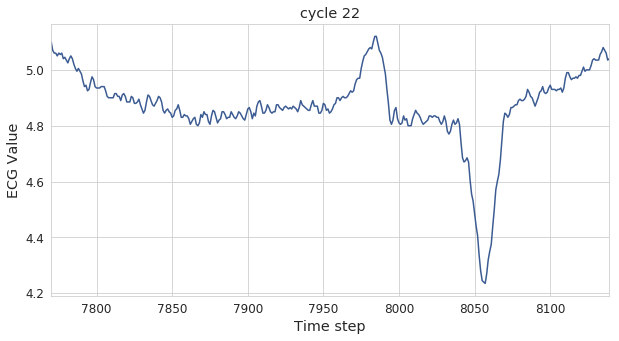

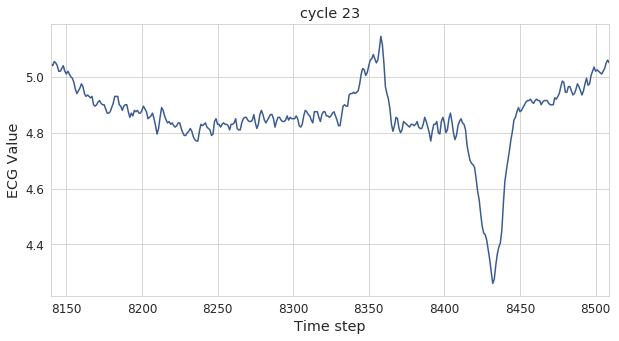

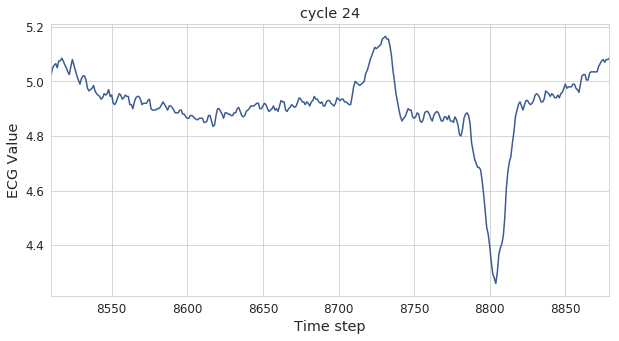

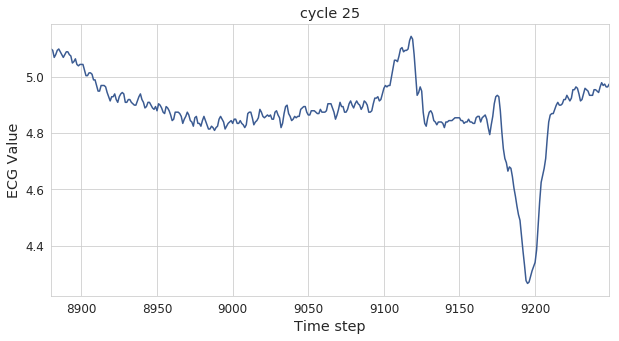

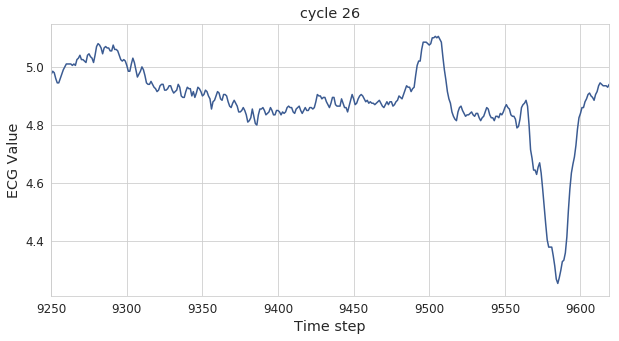

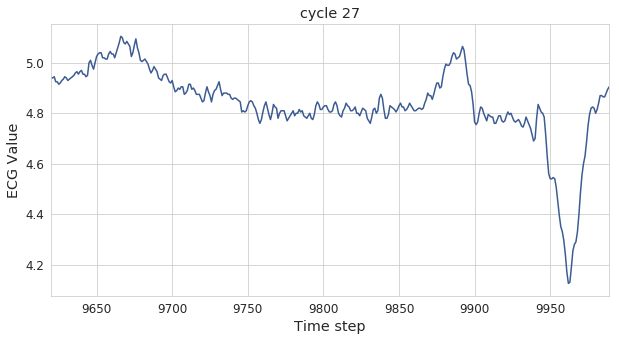

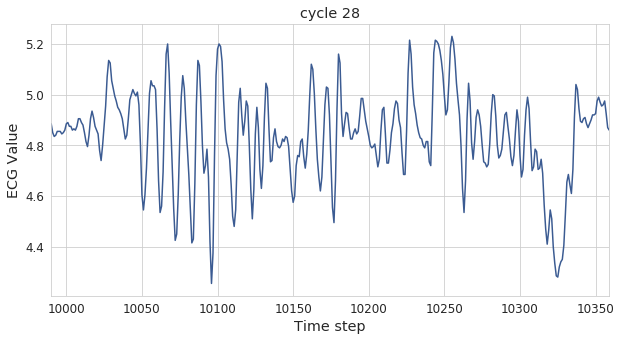

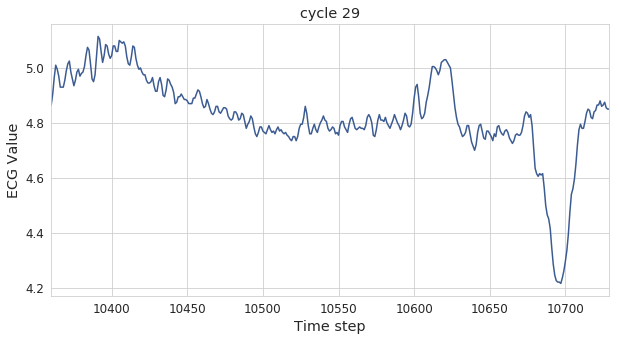

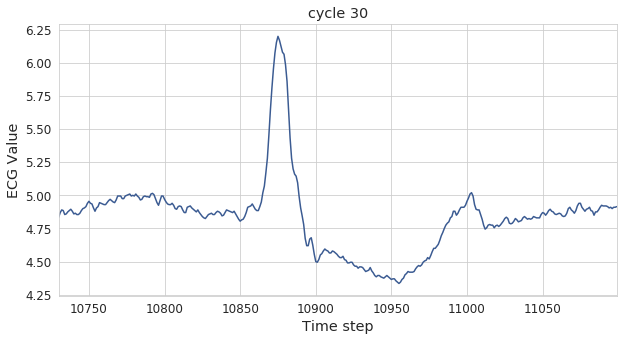

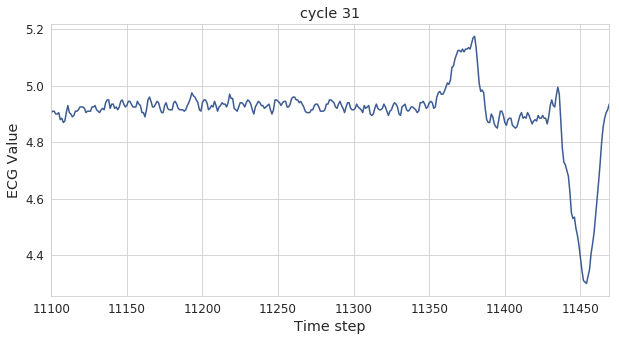

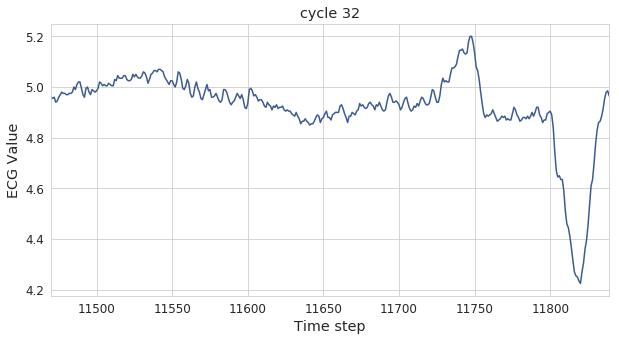

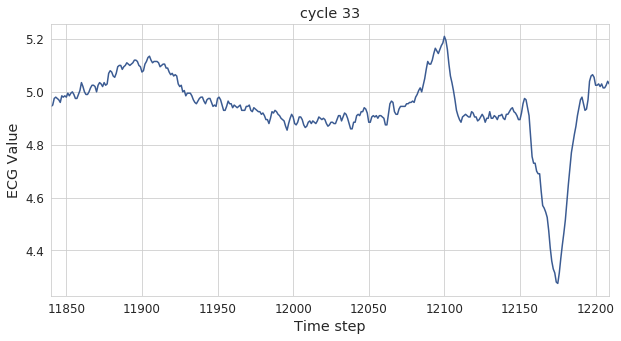

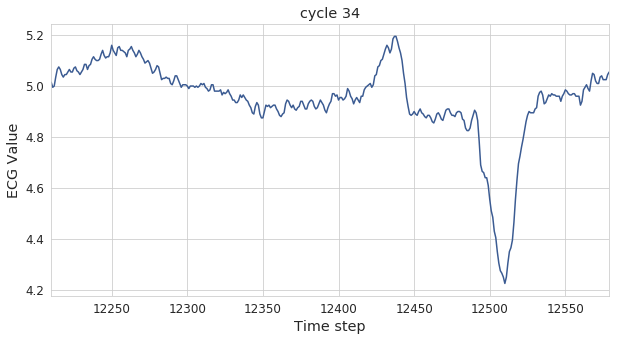

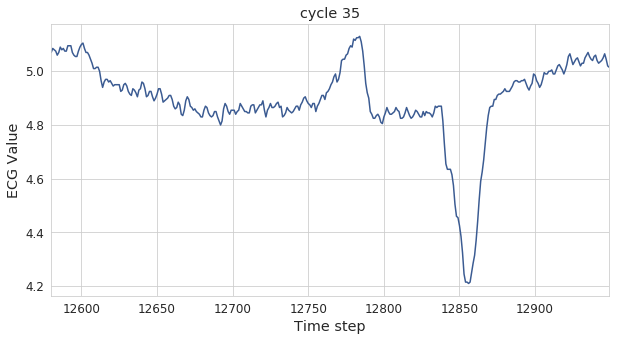

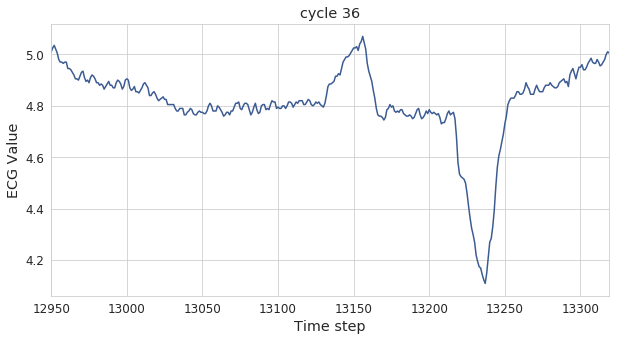

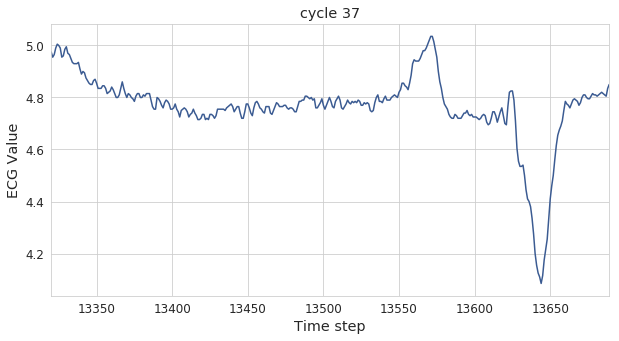

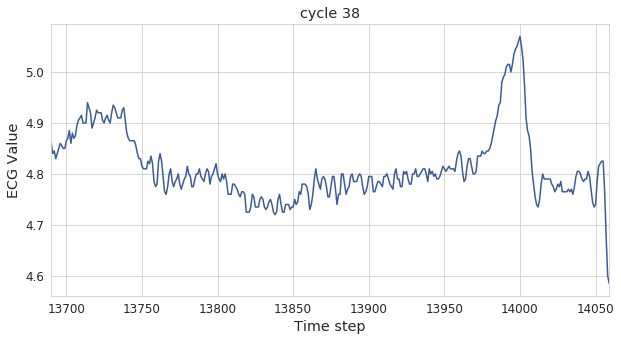

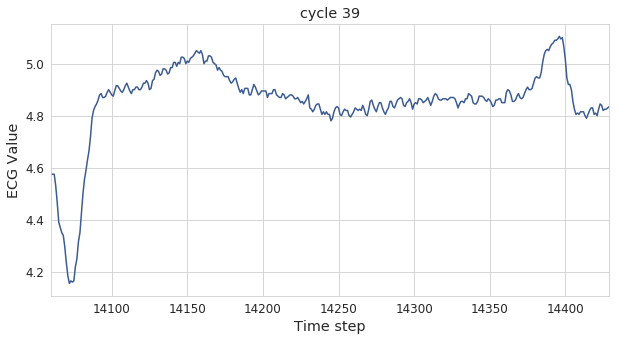

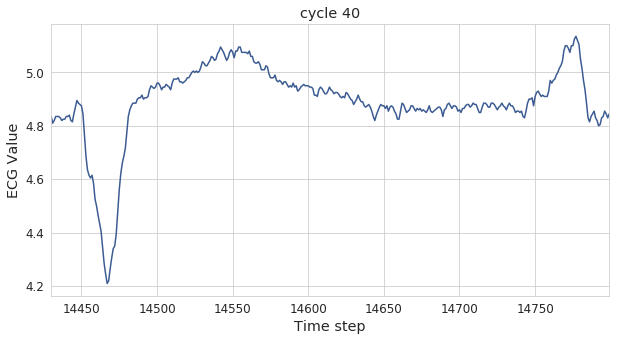

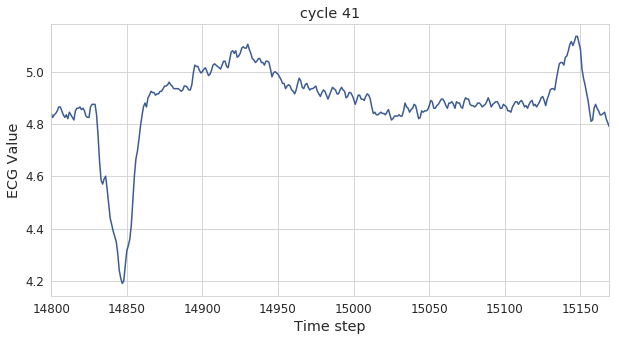

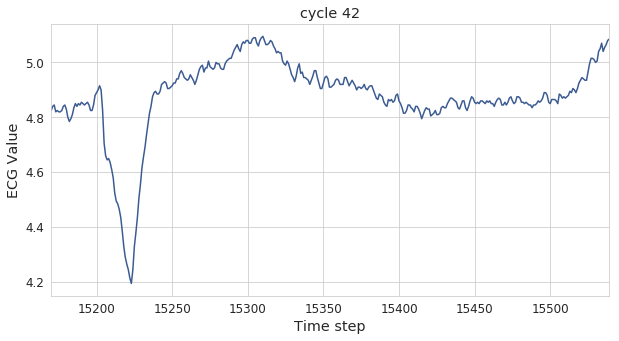

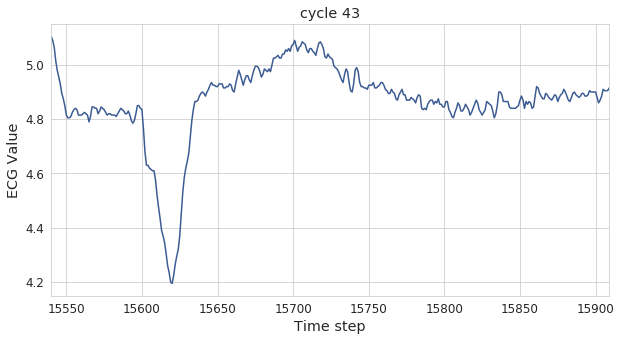

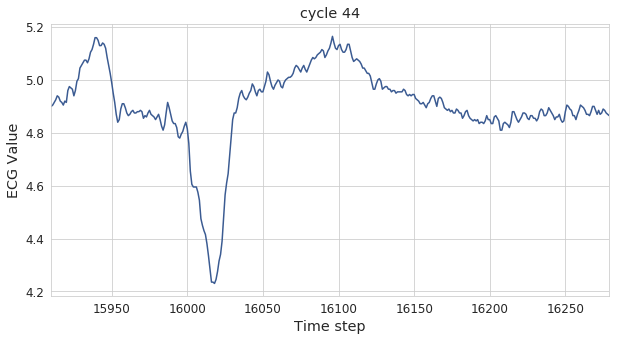

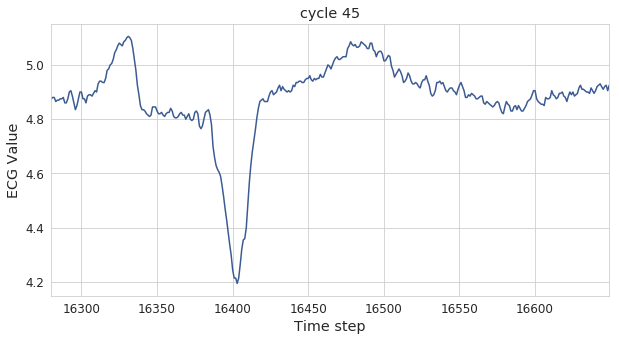

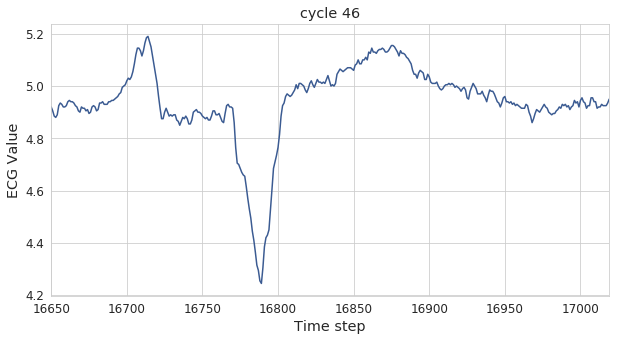

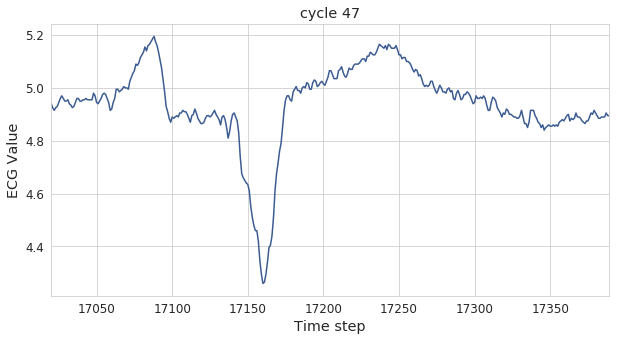

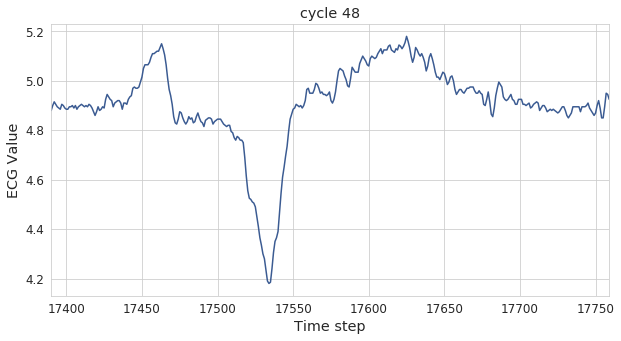

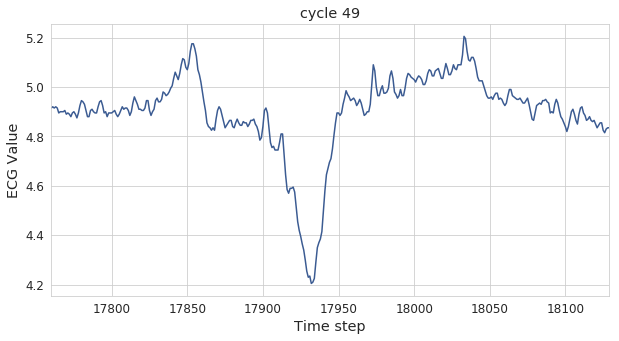

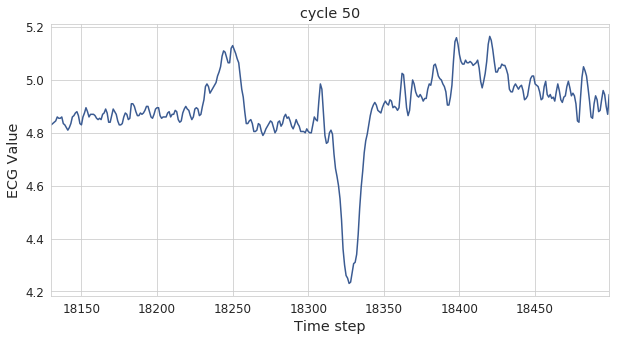

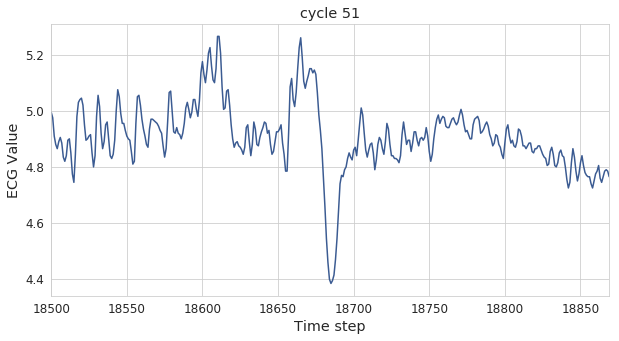

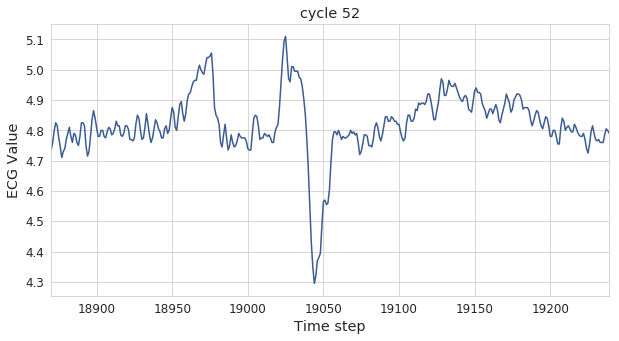

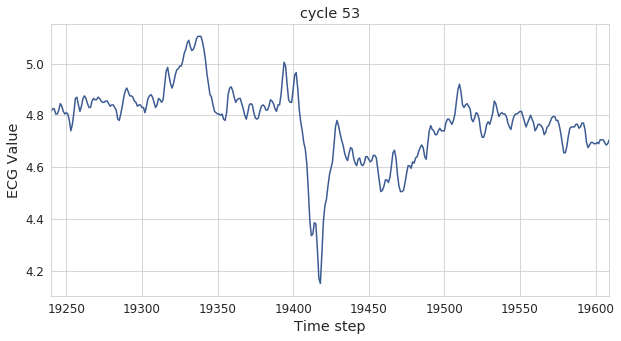

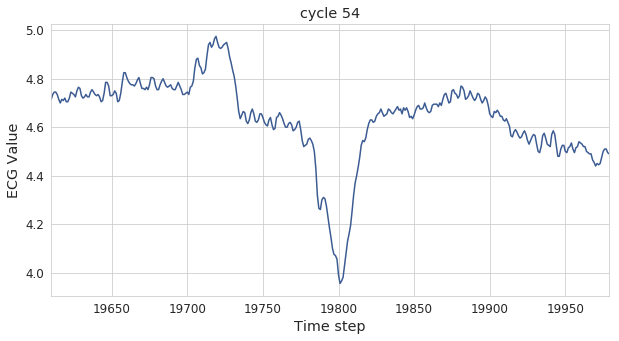

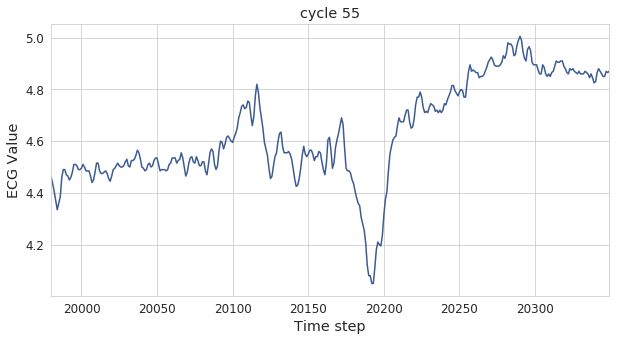

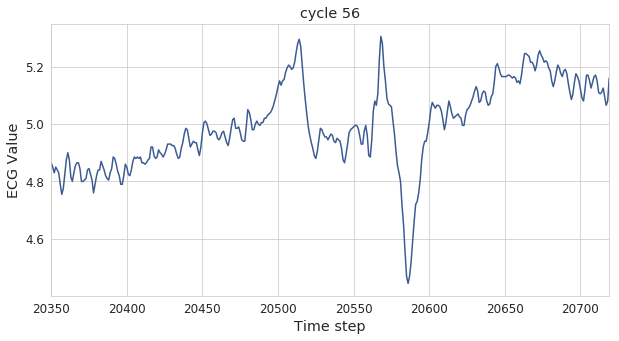

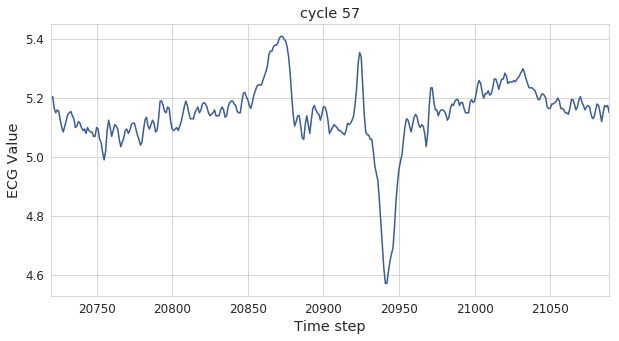

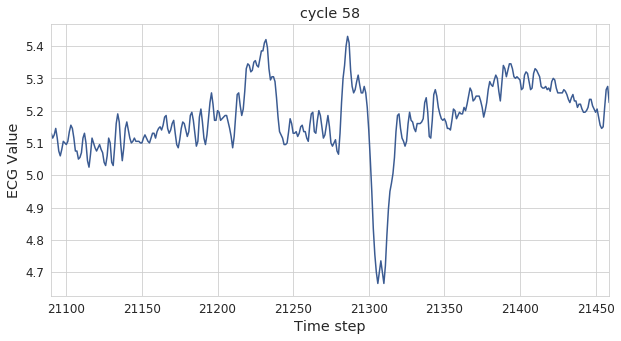

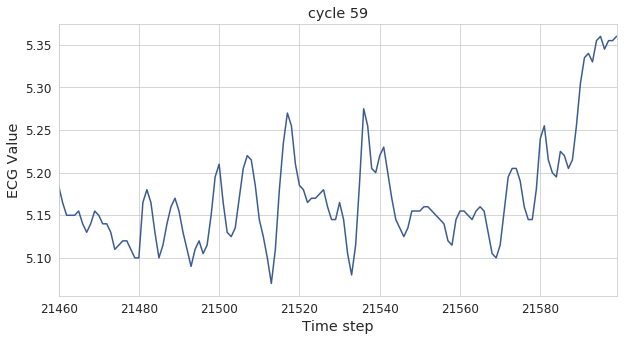

In [11]:
#iterate over a week. a week will have 672 values
step = 370

for i in range(0,df.shape[0],step):
    fig = plt.figure(figsize=(10,5))
    tmp = df[i:i+step]['col1'].plot(color=sns.xkcd_rgb["denim blue"])
    plt.title("cycle %s"%(i/step +1))
    plt.xlabel('Time step')
    plt.ylabel('ECG Value')
    plt.show()
   
    

Size of test: 4750
Size of validation1: 4890
Size of validation2: 4750
Size of train: 11960
Total: 26350
Ratio of test: 0.180266
Ratio of validation1: 0.185579
Ratio of validation2: 0.180266
Ratio of train: 0.453890


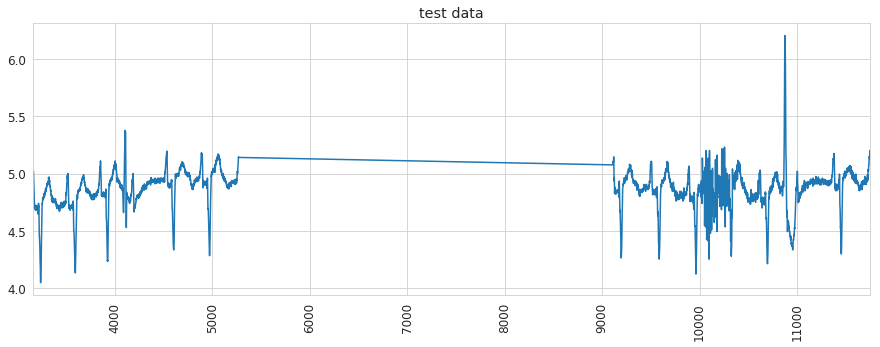

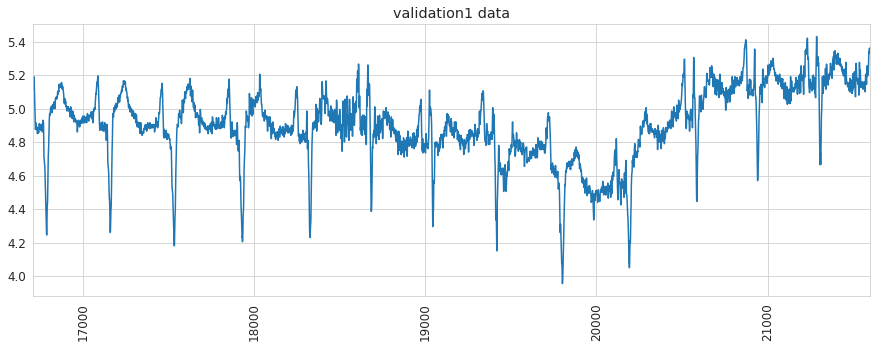

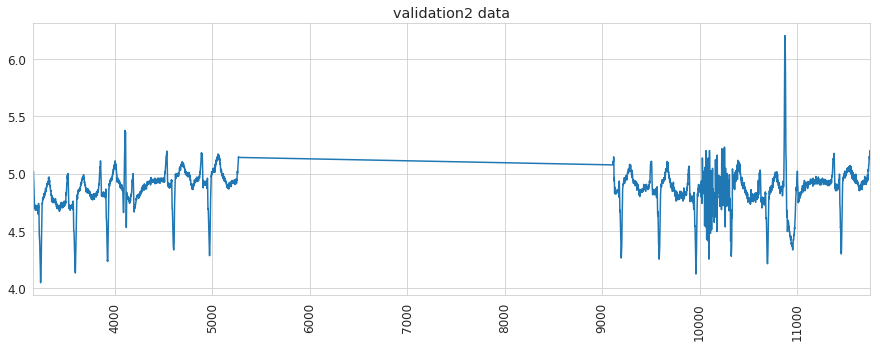

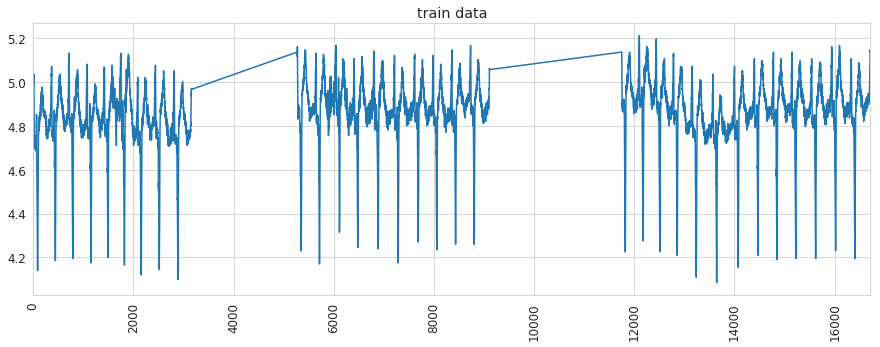

In [12]:
df_anomaly1 = df[3160:5270]
df_anomaly2 = df[9110:11750]
df_test = pd.concat([df_anomaly1,df_anomaly2])
df_validation1= df[16710:]

df_not_train = pd.concat([df_validation1,df_test])
df_train = df[~df.isin(df_not_train)].dropna()
df_validation2 = df_test

df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation1'] = df_validation1
df_dict['validation2'] = df_validation2

count = 0
for key in df_dict:
    print "Size of %s: %d"%(key,df_dict[key].shape[0])
    count += df_dict[key].shape[0]
print "Total: %d"%(count)

for key in df_dict:
    print "Ratio of %s: %f"%(key,float(df_dict[key].shape[0])/count)

    
for key in df_dict:
    df_tmp = df_dict[key]
    plt.figure()
    df_tmp['col1'].plot(figsize=(15,5))
    rows = df_tmp[df_tmp.anomaly.isin([1])].itertuples()
    for row in rows:
        print row
        plt.plot(row[0], row[1], 'r.', markersize=10.0)
    plt.xticks(rotation='vertical')
    plt.title("%s data"%(key))
    plt.show()

In [15]:
for key in df_dict:
    np.save("../resources/data/discords/ECG/%s"%(key),df_dict[key])

### Part 2: Prediction Modeling
Use python scripts: *lstm_predictor.py , stateful_lstm_predictor.py*.

### Part 3: Anomaly Detection

In [ ]:
data_folder = "../resources/data/discords/ECG/"

In [ ]:
#load training data
train_predictions = np.load(data_folder+"train_predictions.npy")
train_true = np.load(data_folder+"train_true.npy")
print train_predictions.shape
print train_true.shape


In [ ]:
#load validation2 data
validation2_predictions = np.load(data_folder+"validation2_predictions.npy")
validation2_true = np.load(data_folder+"validation2_true.npy")
validation2_labels = np.load(data_folder+"validation2_labels.npy")
print np.shape(validation2_predictions)
print np.shape(validation2_true)
print np.shape(validation2_labels)
validation2_labels = np.reshape(validation2_labels,[len(validation2_labels),np.shape(validation2_labels)[1]])
print np.shape(validation2_labels)


In [ ]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print np.shape(test_predictions)
print np.shape(test_true)
test_labels = np.reshape(test_labels,[len(test_labels),np.shape(test_labels)[1]])
print np.shape(test_labels)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions[:,0],label='predicted')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")
plt.show()

In [ ]:
#error vectors
from scipy.stats import norm

train_error_vectors = np.zeros(np.shape(train_predictions))
n_cols = np.shape(train_predictions)[1]
for i in range(n_cols):
    train_error_vectors[:,i] =  train_true -train_predictions[:,i]

#ERROR DIMENSION
error_dimension = 1
train_error_vectors = train_error_vectors[:,0:error_dimension]
mean = np.mean(train_error_vectors)
std = np.std(train_error_vectors)
print mean
print std
p_values= norm(loc=mean, scale=std).logpdf(train_error_vectors)

plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions[:,0],label='predicted')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.title("Train. Using 1 timestep")
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(p_values)
plt.title("p-values")
plt.show()

train_errors_1 = train_true - train_predictions[:,0]

In [ ]:
v2_error_vectors = np.zeros(np.shape(validation2_predictions))
for i in range(n_cols):
    v2_error_vectors[:,i] =  validation2_true -validation2_predictions[:,i]

v2_error_vectors = v2_error_vectors[:,0:error_dimension]
v2_p_values= norm(loc=mean, scale=std).logpdf(v2_error_vectors)

print 
test_error_vectors = np.zeros(np.shape(test_predictions))
for i in range(n_cols):
    test_error_vectors[:,i] =  test_true -test_predictions[:,i]
test_error_vectors = test_error_vectors[:,0:error_dimension]
test_p_values= norm(loc=mean, scale=std).logpdf(test_error_vectors)
test_true_anomalies = np.where(test_labels[:,0]==1)

In [ ]:
threshold_v2 = -23

f = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.1)

v2_below_threshold = np.where(v2_p_values <= threshold_v2)
print v2_below_threshold

ax1 = plt.subplot(211)
ax1.plot(validation2_true,label='True Value',color=sns.xkcd_rgb["denim blue"])
ax1.plot(validation2_predictions[:,0],ls ='dashed',label='Predicted Value',color=sns.xkcd_rgb["medium green"])
ax1.plot(abs(validation2_true - validation2_predictions[:,0]),label='Error',color=sns.xkcd_rgb["pale red"])
for column in v2_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["peach"],alpha=.1)
#for row in v2_true_anomalies:
#    plt.plot(row, validation2_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1,.45),borderaxespad=0.,frameon=True)
plt.ylabel("ECG Value")
#plt.title("Validation2. Using 1 timestep")


#plot v2 log PD
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(v2_p_values,label='Log PD',color=sns.xkcd_rgb["dark teal"])
ax2.axhline(y=threshold_v2,ls='dashed',label='Threshold',color=sns.xkcd_rgb["dark teal"])
ax2.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("Log PD")
#plt.title("Validation2 p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("Time step")
plt.show()
pp = PdfPages('ECG_v2.pdf')
pp.savefig(f)
pp.close()

In [ ]:
test_below_threshold = np.where(test_p_values <= threshold_v2)
#plot test data
f = plt.figure(figsize=(15,7))
plt.subplots_adjust(hspace=0.01)

ax1 = plt.subplot(211)
ax1.plot(test_true,label='True Value',color=sns.xkcd_rgb["denim blue"])
ax1.plot(test_predictions[:,0],ls ='dashed',label='Predicted Value',color=sns.xkcd_rgb["medium green"])
ax1.plot(abs(test_true - test_predictions[:,0]),label='Error',color=sns.xkcd_rgb["pale red"])
for column in test_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["peach"],alpha=0.1)
#for row in test_true_anomalies:
#    plt.plot(row, test_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("Power Consumption")
#plt.title("Test. Using 1 timestep")

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(test_p_values,label='Log PD',color=sns.xkcd_rgb["dark teal"])
ax2.axhline(y=threshold_v2,ls='dashed',label='Threshold',color=sns.xkcd_rgb["dark teal"])
ax2.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("Log PD")
#plt.title("test p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("Time step")
plt.show()
pp = PdfPages('ECG_test.pdf')
pp.savefig(f)
pp.close()

In [ ]:
train_loss = [0.10699289017234616, 0.10966925915041738, 0.08447535473658857, 0.085047259417767501, 0.078818299071434658, 0.075503114102420291, 0.079146501952723033, 0.089050013254858659, 0.079120526558966092, 0.076340759007588452, 0.082741727444922766, 0.080261881907017385, 0.090172597098102963, 0.069755737404509438, 0.074218023097894506, 0.082787167318355642, 0.082324650045624725, 0.081610349526484827, 0.08094883962826499, 0.084740596013646974, 0.083094857304099615, 0.082572251604819236, 0.080948962302684307, 0.080171561591291601, 0.088889754421178371, 0.072743796294303525, 0.078544481039686864, 0.088582896991128687, 0.073822044385882926, 0.082400998155463423, 0.080204951634686175, 0.078249025511569661, 0.08175554669764773, 0.077694773998696801, 0.081510880489477369, 0.088650868249970677, 0.084171685028679319, 0.080241846977749096, 0.082702767939255836, 0.086307859928216241, 0.085045808802090062, 0.081234467710461916, 0.081766376273094854, 0.077703822375372225, 0.082805807800301973, 0.082474513055245391, 0.083559948121356128, 0.076778123902515649, 0.074074128975282288, 0.079748963787744945, 0.081897124768264828, 0.078976122007533844, 0.083714425557552319, 0.076738361884639422, 0.079123651139876419, 0.077237114542566918, 0.077705994441887374, 0.082520215291831442, 0.088736472487269263, 0.076143132283588377, 0.076226096450580913, 0.07802113446889479, 0.067789179498183777, 0.076770478204931561, 0.076778401518389397, 0.085326091412619973, 0.076473836988852448, 0.074434994028188123, 0.073946776998408126, 0.079403215952665807, 0.083055068692678313, 0.073274769717524127, 0.069832782196017393, 0.067333975621994446, 0.081142038666339039, 0.070842861914079749, 0.082353219980793299, 0.088273836809938236, 0.084132512190067718, 0.081464978844554795, 0.081901338795369094, 0.077499519913741058, 0.079382420068159903, 0.082084690521052814, 0.078742926297262122, 0.076530182754062384, 0.071593372362819957, 0.075515152453457066, 0.077668571163746827, 0.080118061246070182, 0.075983429067615557, 0.079712018875582144, 0.080794000331406005, 0.079549350884057013, 0.080734113862653209, 0.08351772070623377, 0.077407073107657862, 0.079710440002799671, 0.07898749623261643, 0.073945460730605067]
v1_loss =  [0.12807080031711399, 0.12667380820361149, 0.10367206429562918, 0.10461300315973324, 0.095927420963767829, 0.090977951047573502, 0.095344139530753505, 0.10698393246054923, 0.095384233418686654, 0.097355742826772382, 0.10215521992349917, 0.099737041653437705, 0.10772133191701271, 0.085225097989687817, 0.090218572547802564, 0.10011358712272886, 0.098638599477306535, 0.099285815758436757, 0.097568283478418991, 0.10394957657026048, 0.10060048319825433, 0.10031938026187406, 0.1004916109352289, 0.096565531360419746, 0.10746041279892589, 0.087087276499339825, 0.093692334542363323, 0.10638980643871503, 0.089250754709840743, 0.10255673417553364, 0.097094568368801815, 0.094701556911342147, 0.10259289421176018, 0.096506208949122554, 0.10015344023704528, 0.10875368978102939, 0.10138687974130603, 0.095522631563613819, 0.10013780352837613, 0.10635036337609384, 0.10232131052148211, 0.10055719275036293, 0.10067986214310869, 0.093279815958204657, 0.10138154933302421, 0.09871086108346358, 0.10376496138256808, 0.094156198021268511, 0.088720711098180569, 0.097667469643792609, 0.1002885720020608, 0.09622323745456085, 0.10406198084543322, 0.092704948749833399, 0.096627603116489588, 0.096783207464634757, 0.096723502362665192, 0.10129524935733353, 0.11022978698372081, 0.094068659052430864, 0.094195032970566875, 0.094557170630547874, 0.079766983541246422, 0.090646983288841951, 0.091149280571937566, 0.097898419293238698, 0.087990300395549878, 0.081382910048091714, 0.08666640323964972, 0.091990611878743606, 0.099112987805792752, 0.082928778227547531, 0.078972033184507615, 0.075665339023042941, 0.09404916849828536, 0.078010803351631269, 0.096410399444268866, 0.10350643707892541, 0.098336649413633501, 0.093998541872993654, 0.095161168125112397, 0.089631198712799093, 0.090877861558616935, 0.094726440433948428, 0.088407671645404848, 0.087316922570652253, 0.078639866766013228, 0.087627184007259148, 0.08305938755804719, 0.090839796273075799, 0.08638450405956094, 0.089664902011098571, 0.091811893077997059, 0.090700741067077179, 0.0913135012642282, 0.08963653293665165, 0.085276688970564229, 0.090021032494115555, 0.090241521596908569, 0.079823863040272586]
test_loss = [0.32396789373826818, 0.29756575692291881, 0.31263522869930493, 0.31309771750093235, 0.30847415299418102, 0.29527916392619208, 0.31339053786998561, 0.35623059370502885, 0.33366468810551875, 0.32572499749102207, 0.35257559681384432, 0.3395204009335136, 0.38584113074427223, 0.31994604148778572, 0.31688557979325915, 0.36472973399546466, 0.35262511623944526, 0.35014437281993371, 0.34449051703959765, 0.36064712768666957, 0.37490850569054196, 0.34857903373757587, 0.35430672709869154, 0.3428640107457932, 0.40475971317392284, 0.32007337965088567, 0.35344658295681991, 0.37313195049939629, 0.32985565766527858, 0.35569904691056758, 0.33983389256892693, 0.3444924413772138, 0.35030158562348535, 0.37328788576119015, 0.34444996771539094, 0.37645498082519563, 0.38598825190035896, 0.35607402492809226, 0.35828896953268757, 0.37667912117479713, 0.36025655893038733, 0.36491590217246977, 0.35899295819814742, 0.347154881923256, 0.34785865286563306, 0.34361917946497972, 0.3738543512581155, 0.35201704498457353, 0.34398791298041759, 0.35463960848835963, 0.35957765765884964, 0.34909081827843591, 0.35807381501740509, 0.33510136733753193, 0.34610986600298366, 0.35087531672202338, 0.34842332249106805, 0.35291127712074971, 0.38348996502196642, 0.34671032652020328, 0.33118811186107178, 0.36691714526527386, 0.31856803773770676, 0.33542081168531429, 0.34903661939832897, 0.35486644321742489, 0.3585875814015308, 0.37222108150429517, 0.33085811010683774, 0.34903247880106941, 0.36843051146405043, 0.34893656378062254, 0.31617924800678476, 0.33387273223841379, 0.3608847750394707, 0.33748230484985875, 0.35851557924385857, 0.37898909118412033, 0.37245693504874205, 0.34925802330559347, 0.35761831098876729, 0.34482095910005756, 0.35222199073693417, 0.36728029693657688, 0.36111624488375216, 0.37999480986421164, 0.30322295241457753, 0.35957162291137912, 0.32334483317595575, 0.36215916134008913, 0.34225546169047916, 0.34918822929689047, 0.36453614305778503, 0.35482765819578627, 0.35918695285756103, 0.34058275428586787, 0.36999181623405514, 0.36317346496609737, 0.35817555633858261, 0.36161456511018092]
lookback_limit =30
train_loss = train_loss[0:lookback_limit]

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.plot(np.append(np.roll(train_loss,1),train_loss[lookback_limit-1]),label='train')
#plt.plot(test_loss,label='test')
plt.xlim(1, lookback_limit)
plt.xticks(np.arange(1,lookback_limit+1,1))
#plt.legend()
plt.xlabel("Lookback")
plt.ylabel("MSE")
plt.show()
pp = PdfPages('ECG_lookbacks.pdf')
pp.savefig(fig)
pp.close()

In [ ]:
plt.hist(train_error_vectors,bins = 100)
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
fig = sm.qqplot(train_error_vectors, fit=True,line='s')
plt.show()

In [ ]:
error_vectors = np.reshape(train_error_vectors,[len(train_error_vectors)])
stats.probplot(error_vectors, plot=pylab)
plt.show()

In [ ]:
stats.normaltest(error_vectors)

In [ ]:
norm_x = np.random.normal(loc=8.5, scale=2.5, size=1000)

In [ ]:
stats.normaltest(norm_x)

In [ ]:
mu, std = norm.fit(error_vectors)

In [ ]:
print mu,std

In [ ]:
print mean,std

In [ ]:
print stats.kstest(error_vectors, "norm", stats.norm.fit(error_vectors))

In [ ]:
log_errors = np.log( error_vectors +1 - np.amin(error_vectors))

In [ ]:
np.count_nonzero(~np.isnan(log_errors))

In [ ]:
stats.probplot(log_errors, plot=pylab)
plt.show()

In [ ]:
stats.normaltest(log_errors)